<div style="text-align: center; background-color: cream;">
  <h1 style="color: #4B0082, font-family: 'Merriweather', serif;">LOAN DATASET ANALYSIS</h1>
    <br>
    <b>By Abdulhamid Abdulhamid</b>
</div>

In [1]:
import pandas as pd  # for data frame manipulation
import numpy as np  # for numerical operations
from sklearn.model_selection import train_test_split  # for splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # for scaling features
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier  # Random Forest for classification
from sklearn.linear_model import LogisticRegression  # Logistic Regression for classification
from sklearn import svm  # Support Vector Classifier for classification
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors for classification
from sklearn.tree import DecisionTreeClassifier  # Decision Tree for classificationfrom sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # for evaluating the model
import matplotlib.pyplot as plt  # for plotting graphs and visualizations
import seaborn as sns  # for statistical data visualization
%matplotlib inline
# overriding matplotlib 
sns.set()

In [2]:
# importing data analysis libraries
import numpy as np
import pandas as pd

# importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# overriding matplotlib 
sns.set()

# import datetime
import datetime as dt

# import the preprocessing classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# import train/test split module
from sklearn.model_selection import train_test_split

# import the regressors
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

# import metrics
from sklearn.metrics import mean_squared_error

# import warnings
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("LoanDataset.csv")
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


# <div id='wrangling'></div>

## 2. Data Wrangling
In this section, we will identify and address any errors, inconsistencies, missing values, or duplicate entries in the dataset. This will ensure that the dataset is accurate, consistent, and complete, and will make it more suitable for analysis. 

Thus we will address the following questions to ensure the quality and reliability of the dataset:
1. Are there any missing values in the dataset, and if so, what is their extent and data type?
2. Are there any duplicate entries in the dataset?
3. Are there any outliers in the dataset that may impact the analysis?
4. Does the dataset require any feature engineering to better support the analysis goals?

**1. Are there any missing values in the dataset, and if so, what is their extent and data type?**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


From the above we can see that there are some missing values. Also, the `customer_income` and `loan_amnt` need to be converted to float data type

In [5]:
df['loan_amnt'] = df['loan_amnt'].str.replace('£', '').str.replace(',', '').astype(float)
df['customer_income'] = df['customer_income'].str.replace(',', '').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  float64
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  float64
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usage: 3.2+ MB


They are now in the appropriate format. Now let's resolve the missing values. For numerical values, we replac the missing values with median as its insensitive to outliers. while categotrical values like those in the historical_defaullt can be replace with the most frequent value - that is the mode 

Let us create a fucntion to replace the null values with the mean or median

In [6]:
def fill_nulls(df, column_name):
    if df[column_name].isnull().any():
        if df[column_name].dtype == 'object':
            mode_value = df[column_name].mode()[0]
            df[column_name].fillna(mode_value, inplace=True)
        else:
            median_value = df[column_name].median()
            df[column_name].fillna(median_value, inplace=True)
    return df

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  float64
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  float64
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(5), int64(3), object(5)
memory usage: 3.2+ MB


No more null values

In [8]:
# check duplicates
df[df.duplicated()]

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
323,323.0,25,120000.0,RENT,6.0,MEDICAL,A,1000000.0,10.74,10,N,2,DEFAULT
325,324.0,23,120000.0,RENT,7.0,EDUCATION,A,25000.0,9.99,10,NaN,2,NO DEFAULT
14691,14688.0,21,32000.0,RENT,6.0,PERSONAL,B,15000.0,15.27,1,Y,3,DEFAULT
14692,14689.0,22,38000.0,RENT,6.0,PERSONAL,A,15000.0,7.88,2,N,3,DEFAULT
30289,30284.0,47,70000.0,RENT,3.0,HOMEIMPROVEMENT,A,6000.0,8.49,7,N,12,NO DEFAULT
30290,30285.0,44,70000.0,RENT,15.0,DEBTCONSOLIDATION,A,6000.0,5.79,4,N,16,DEFAULT


In [9]:
# Drop the duplicates based on the ID column as any other column can be the same
df = df.drop_duplicates(subset=['customer_id'])

No more duplicates

In [10]:
df.describe()

,customer_id,customer_age,customer_income,employment_duration,loan_amnt,loan_int_rate,term_years,cred_hist_length
count,32577.000000,32578.000000,3.257800e+04,31683.000000,3.257700e+04,29463.000000,32578.000000,32578.000000
mean,16289.717101,27.732243,6.607387e+04,4.789698,9.724815e+03,11.011806,4.761557,5.803825
std,9405.306296,6.359500,6.198586e+04,4.142793,2.107156e+04,3.240496,2.470850,4.054799
min,1.000000,3.000000,4.000000e+03,0.000000,5.000000e+02,5.420000,1.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5.000000e+03,7.900000,3.000000,3.000000
50%,16289.000000,26.000000,5.500000e+04,4.000000,8.000000e+03,10.990000,4.000000,4.000000
75%,24433.000000,30.000000,7.920000e+04,7.000000,1.220000e+04,13.470000,7.000000,8.000000
max,32581.000000,144.000000,6.000000e+06,123.000000,3.500000e+06,23.220000,10.000000,30.000000


In [11]:
df.shape

(32578, 13)

In [12]:
df.dropna(inplace=True)
df.shape

(10416, 13)

In [13]:
df = df.dropna()
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,DEFAULT
2,3.0,25,9600.0,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,DEFAULT
3,4.0,23,65500.0,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,DEFAULT
4,5.0,24,54400.0,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,DEFAULT
5,6.0,21,9900.0,OWN,2.0,VENTURE,A,2500.0,7.14,1,N,2,DEFAULT


**4. Does the dataset require any feature engineering to better support the analysis goals?**

In [14]:
df.Current_loan_status.unique()

array(['DEFAULT', 'NO DEFAULT'], dtype=object)

In [15]:
# Label encoding
df.replace({"Current_loan_status":{"DEFAULT":0,"NO DEFAULT":1}}, inplace = True)

In [16]:
df

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,0
2,3.0,25,9600.0,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,0
3,4.0,23,65500.0,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,0
4,5.0,24,54400.0,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,0
5,6.0,21,9900.0,OWN,2.0,VENTURE,A,2500.0,7.14,1,N,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32570,32566.0,57,40000.0,RENT,1.0,MEDICAL,A,15000.0,8.90,7,N,21,0
32573,32569.0,60,49008.0,OWN,5.0,PERSONAL,C,12000.0,13.79,6,Y,21,1
32576,32572.0,60,45600.0,RENT,1.0,VENTURE,B,20000.0,10.00,6,N,26,0
32579,32575.0,52,65004.0,RENT,4.0,PERSONAL,D,20000.0,15.58,2,Y,19,0


## DATA VISUALIZATION

In [17]:
df.columns

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status'],
      dtype='object')

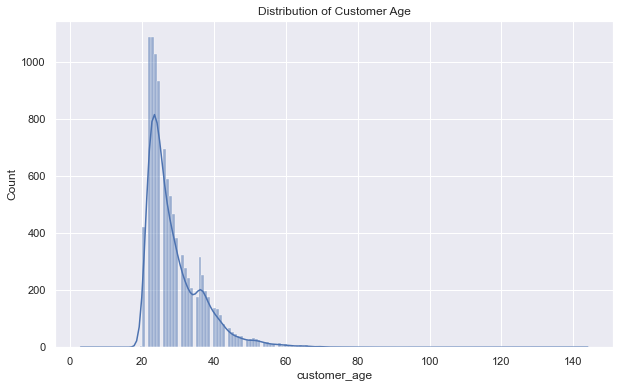

In [18]:
# Distribution of Customer Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='customer_age', kde=True)
plt.title('Distribution of Customer Age')
plt.show()

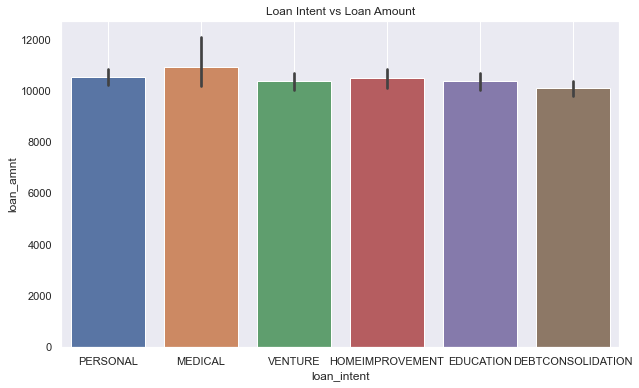

In [19]:
# Loan Intent vs Loan Amount
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df['loan_intent'], y='loan_amnt')
plt.title('Loan Intent vs Loan Amount')
plt.grid()
plt.show()

In [20]:
# Define the age bins and labels
bins = [0, 29, 59, 100]
labels = ['young age', 'middle age', 'old age']

# Create a new column with the age categories
df['age_category'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=False)

df

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,age_category
0,1.0,22,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,0,young age
2,3.0,25,9600.0,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,0,young age
3,4.0,23,65500.0,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,0,young age
4,5.0,24,54400.0,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,0,young age
5,6.0,21,9900.0,OWN,2.0,VENTURE,A,2500.0,7.14,1,N,2,0,young age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32570,32566.0,57,40000.0,RENT,1.0,MEDICAL,A,15000.0,8.90,7,N,21,0,middle age
32573,32569.0,60,49008.0,OWN,5.0,PERSONAL,C,12000.0,13.79,6,Y,21,1,old age
32576,32572.0,60,45600.0,RENT,1.0,VENTURE,B,20000.0,10.00,6,N,26,0,old age
32579,32575.0,52,65004.0,RENT,4.0,PERSONAL,D,20000.0,15.58,2,Y,19,0,middle age


In [21]:
df.dropna(inplace=True)
df.shape

(10415, 14)

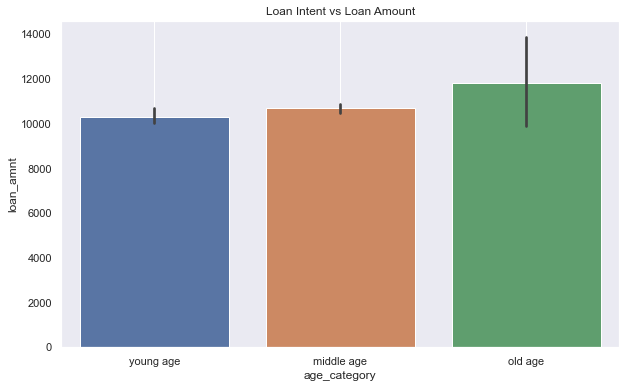

In [22]:
# Loan Intent vs Loan Amount
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=df['age_category'], y='loan_amnt')
plt.title('Loan Intent vs Loan Amount')
plt.grid()
plt.show()

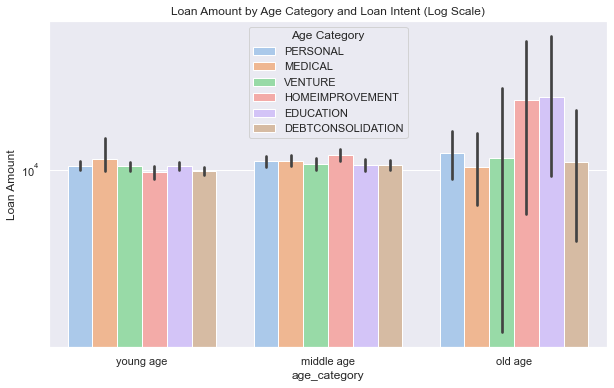

In [23]:
# Create the plot using boxplot
plt.figure(figsize=(10, 6))
sns.barplot(x='age_category', y='loan_amnt', hue= "loan_intent", palette = 'pastel', data=df)
plt.yscale('log')
plt.title('Loan Amount by Age Category and Loan Intent (Log Scale)')
plt.ylabel('Loan Amount')
plt.legend(title='Age Category')
plt.show()

In [24]:
df

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,age_category
0,1.0,22,59000.0,RENT,123.0,PERSONAL,C,35000.0,16.02,10,Y,3,0,young age
2,3.0,25,9600.0,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,N,3,0,young age
3,4.0,23,65500.0,RENT,4.0,MEDICAL,B,35000.0,15.23,10,N,2,0,young age
4,5.0,24,54400.0,RENT,8.0,MEDICAL,B,35000.0,14.27,10,Y,4,0,young age
5,6.0,21,9900.0,OWN,2.0,VENTURE,A,2500.0,7.14,1,N,2,0,young age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32570,32566.0,57,40000.0,RENT,1.0,MEDICAL,A,15000.0,8.90,7,N,21,0,middle age
32573,32569.0,60,49008.0,OWN,5.0,PERSONAL,C,12000.0,13.79,6,Y,21,1,old age
32576,32572.0,60,45600.0,RENT,1.0,VENTURE,B,20000.0,10.00,6,N,26,0,old age
32579,32575.0,52,65004.0,RENT,4.0,PERSONAL,D,20000.0,15.58,2,Y,19,0,middle age


In [25]:
# Convert ategorical values with numerical values
df["loan_intent"].unique()

array(['PERSONAL', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'EDUCATION',
       'DEBTCONSOLIDATION'], dtype=object)

Let's convert the categorical variables into numerical values

In [26]:
df.historical_default.unique()

array(['Y', 'N'], dtype=object)

In [27]:
home_ownership_mapping = {
    'RENT': 1,
    'MORTGAGE': 2,
    'OWN': 3,
    'OTHER': 4
}

loan_intent_mapping = {
    'PERSONAL': 1,
    'MEDICAL': 2,
    'VENTURE': 3,
    'HOMEIMPROVEMENT': 4,
    'EDUCATION': 5,
    'DEBTCONSOLIDATION': 6
}

loan_grade_mapping = {
    'C': 1,
    'B': 2,
    'A': 3,
    'D': 4,
    'E': 5
}

historical_default_mapping = {
    "Y": 1,
    'N': 2,    
}
age_category_mapping = {
    'young age': 1,
    'middle age': 2,
    'old age': 3
}

# Replace categorical values with numerical values
df.replace({
    'home_ownership': home_ownership_mapping,
    'loan_intent': loan_intent_mapping,
    'loan_grade': loan_grade_mapping,
    'age_category': age_category_mapping,
    'historical_default': historical_default_mapping
}, inplace=True)

In [28]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status,age_category
0,1.0,22,59000.0,1,123.0,1,1,35000.0,16.02,10,1,3,0,1
2,3.0,25,9600.0,2,1.0,2,2,5500.0,12.87,5,2,3,0,1
3,4.0,23,65500.0,1,4.0,2,2,35000.0,15.23,10,2,2,0,1
4,5.0,24,54400.0,1,8.0,2,2,35000.0,14.27,10,1,4,0,1
5,6.0,21,9900.0,3,2.0,3,3,2500.0,7.14,1,2,2,0,1


In [29]:
# Let's sepperate the data into labels and target
X = df.drop(columns = ["customer_id", "Current_loan_status"], axis = 1)
y = df["Current_loan_status"]

In [30]:
y

0        0
2        0
3        0
4        0
5        0
        ..
32570    0
32573    1
32576    0
32579    0
32583    0
Name: Current_loan_status, Length: 10415, dtype: int64

In [31]:
X.dropna()
X.shape

(10415, 12)

In [32]:
df.isnull().sum()

customer_id            0
customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
historical_default     0
cred_hist_length       0
Current_loan_status    0
age_category           0
dtype: int64

In [33]:
df.age_category.unique()

array([1, 2, 3], dtype=int64)

Split the data into training and testing datstet

In [34]:
X_train, X_test, y_train, y_test,  = train_test_split(X,y, test_size = 0.2, stratify = y, random_state = 42)

In [35]:
print(X_train.shape, y_train.shape, X_test.shape, y_train.shape)

(8332, 12) (8332,) (2083, 12) (8332,)


# MODEL EVALUATION

<div id='model'></div>

## 4. Model Selection and Evaluation
In this section, we will evaluate the performance of several different regressors on our data. We will use root mean squared error (RMSE) as our evaluation metric. RMSE is a measure of the difference between the predicted values and the true values. It is calculated as the square root of the mean squared error (MSE), where MSE is the average of the squared differences between the predicted and true values. Lower values of RMSE indicate better performance.

We will fit and evaluate the following regressors:
- Random Forest Regressor
- Support Vector Regressor, etc.

We will fit each of these regressors to our training data and make predictions on the test set. Then, we will calculate the RMSE of the predictions and compare the results to choose the best regressor.

To ensure that the original dataset is not modified during the modeling process and to facilitate debugging if needed, we will create a copy of the preprocessed dataset before fitting our various models. This will help to preserve the integrity of the original data and allow us to refer to it if any issues arise during the modeling process.


In [36]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate a model on training and test data.

    Parameters
    ----------
    model : object
        A scikit-learn estimator object.
    X_train : array-like or pd.DataFrame
        Training data with shape (n_samples, n_features).
    y_train : array-like
        Training labels with shape (n_samples,).
    X_test : array-like or pd.DataFrame
        Test data with shape (n_samples, n_features).
    y_test : array-like
        Test labels with shape (n_samples,).

    Returns
    -------
    rmse : float
        Root mean squared error between the test labels and the predictions.
    """
    # train
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    # calculate RMSE
    rmse = np.sqrt(mse)
    return rmse


In [37]:
def evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test):
    """
    This function takes a list of regressors, their names, and the training and test data as input
    and returns a dataframe with the names of the regressors and their root mean squared error (RMSE)
    on the test data.
    
    Parameters:
    -----------
    regressors (list): a list of scikit-learn compatible regression models
    regressor_names (list): a list of strings containing the names of the regression models
    X_train (pandas DataFrame): a pandas DataFrame containing the features for training the models
    y_train (pandas Series): a pandas Series containing the target values for training the models
    X_test (pandas DataFrame): a pandas DataFrame containing the features for testing the models
    y_test (pandas Series): a pandas Series containing the target values for testing the models
    
    Returns:
    --------
    pandas DataFrame: a dataframe containing the names of the regressors and their corresponding RMSE on the test data
    """
    
    # evaluate the models and compute their RMSE on the test data
    rmses = [evaluate_model(regressor, X_train, y_train, X_test, y_test) for regressor in regressors]
    
    # create a dictionary mapping the names of the regressors to their RMSE
    regressor_rmses = dict(zip(regressor_names, rmses))
    
    # convert the dictionary to a pandas dataframe
    df = pd.DataFrame.from_dict(regressor_rmses, orient='index')
    
    # reset the index of the dataframe
    df = df.reset_index()
    
    # rename the columns of the dataframe
    df.columns = ['regressor_name', 'rmse']
    
    # sort the dataframe by RMSE in ascending order
    return df.sort_values('rmse', ignore_index=True)


In [38]:
# initialize the regressors
linear_regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([("polynomial_features", polynomial_features),
("linear_regression", linear_regressor)])
ridge_regressor = Ridge()
lasso_regressor = Lasso()
elastic_net_regressor = ElasticNet()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
boosted_tree_regressor = GradientBoostingRegressor()
neural_network_regressor = MLPRegressor()
support_vector_regressor = SVR()
grad_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='ls')
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
spline_regressor = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [39]:
# collect the list of regressors
regressors = [linear_regressor, polynomial_regressor, ridge_regressor, lasso_regressor, elastic_net_regressor, 
              decision_tree_regressor, random_forest_regressor, boosted_tree_regressor, neural_network_regressor, 
              support_vector_regressor, knn_regressor, spline_regressor]

# collect the names of regressors
regressor_names = ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression", 
                   "Elastic Net Regression", "Decision Tree Regression", "Random Forest Regression", 
                   "Boosted Tree Regression", "Neural Network Regression", "Support Vector Regression", 
                   "K-Nearest Neighbour Regression", "Spline Regression"]


In [40]:
print('\033[1m Table of regressors and their RMSEs')
evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test)

 Table of regressors and their RMSEs


,regressor_name,rmse
0,Random Forest Regression,0.255696
1,Boosted Tree Regression,0.291146
2,Polynomial Regression,0.336573
3,Decision Tree Regression,0.345744
4,Linear Regression,0.376960
5,Ridge Regression,0.376963
6,K-Nearest Neighbour Regression,0.447321
7,Support Vector Regression,0.473408
8,Elastic Net Regression,0.477199
9,Lasso Regression,0.484390
